In [1]:
import scanpy as sc

adata = sc.datasets.pbmc3k_processed()

# Run leiden clustering for different resolutions
for resolution in [0.2, 0.4, 0.6, 0.8, 1.0]:
    sc.tl.leiden(
        adata,
        resolution=resolution,
        flavor="igraph",
        n_iterations=2,
        key_added=f"leiden_{str(resolution).replace('.', '_')}",
    )

In [2]:
from pyclustree import clustree
from pyclustree._utils import transition_matrix

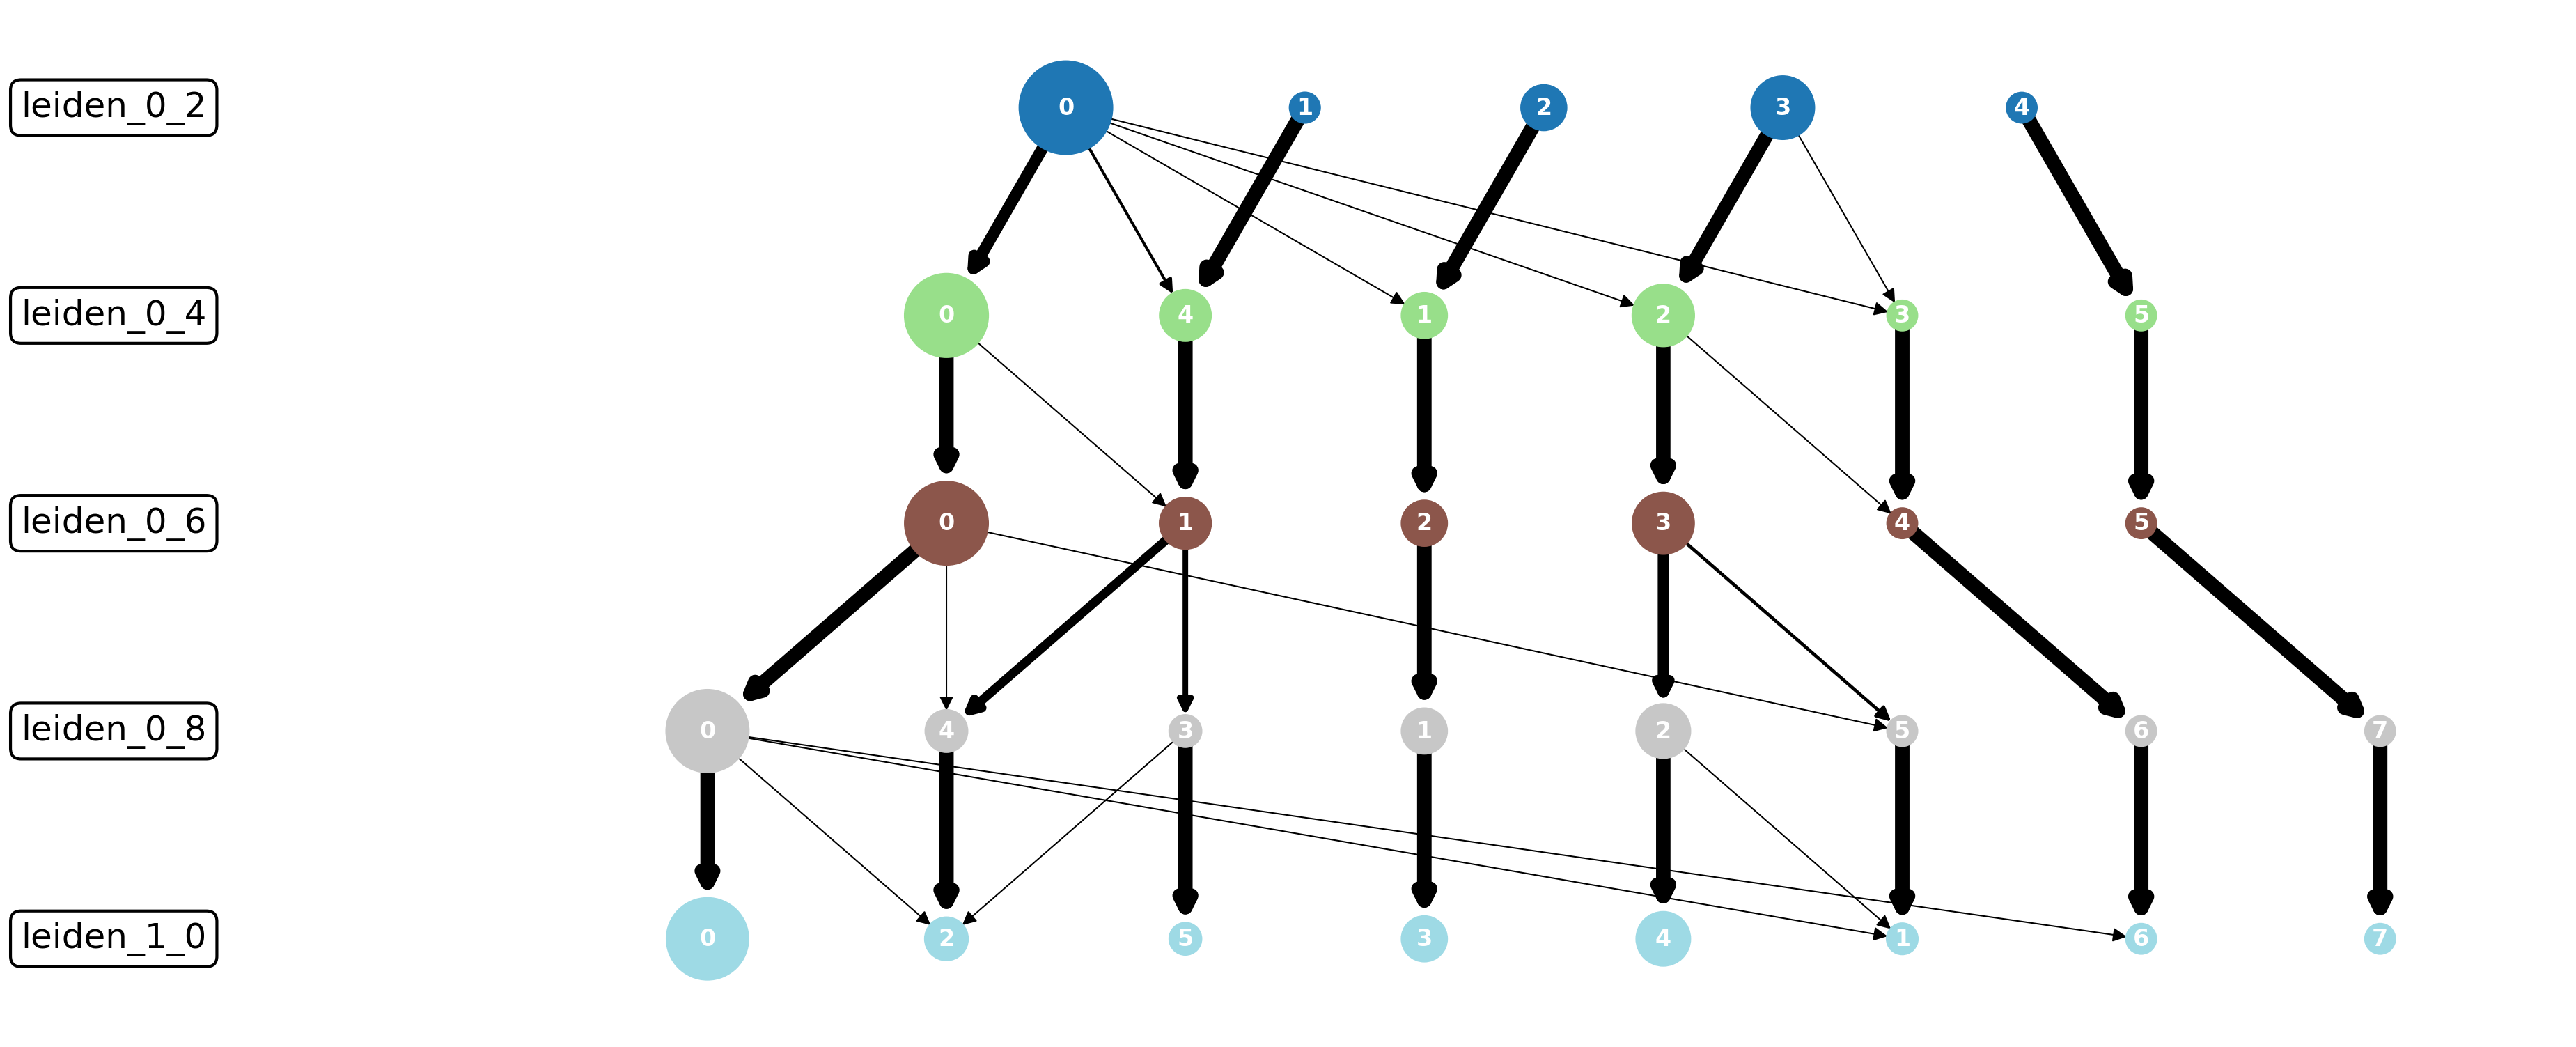

In [3]:
# Create a clustree visualization
cluster_keys = [f"leiden_{str(resolution).replace('.', '_')}" for resolution in [0.2, 0.4, 0.6, 0.8, 1.0]]
fig = clustree(
    adata,
    cluster_keys=cluster_keys,
    transition_plot="sankey",
)

In [4]:
df_cluster_assignments = adata.obs[cluster_keys]

transition_matrices = [
    transition_matrix(
        df_cluster_assignments[cluster_keys[i]],
        df_cluster_assignments[cluster_keys[i + 1]],
    )
    for i in range(len(cluster_keys) - 1)
]

In [ ]:
for key in cluster_keys:
    df_cluster_assignments[key] = df_cluster_assignments[key].map(lambda x: f"{key}-" + x)  # noqa: B023

/tmp/ipykernel_4343/4183214710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_assignments[key] = df_cluster_assignments[key].map(lambda x: f"{key}-" + x)
/tmp/ipykernel_4343/4183214710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_assignments[key] = df_cluster_assignments[key].map(lambda x: f"{key}-" + x)
/tmp/ipykernel_4343/4183214710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [6]:
from matplotlib_sankey import from_matrix

all_matrices = []
for i in range(len(cluster_keys) - 1):
    all_matrices.append(
        from_matrix(
            transition_matrices[i].to_numpy(),
            source_indicies=transition_matrices[i].index.tolist(),
            target_indicies=transition_matrices[i].columns.tolist(),
        )
    )

<Axes: >

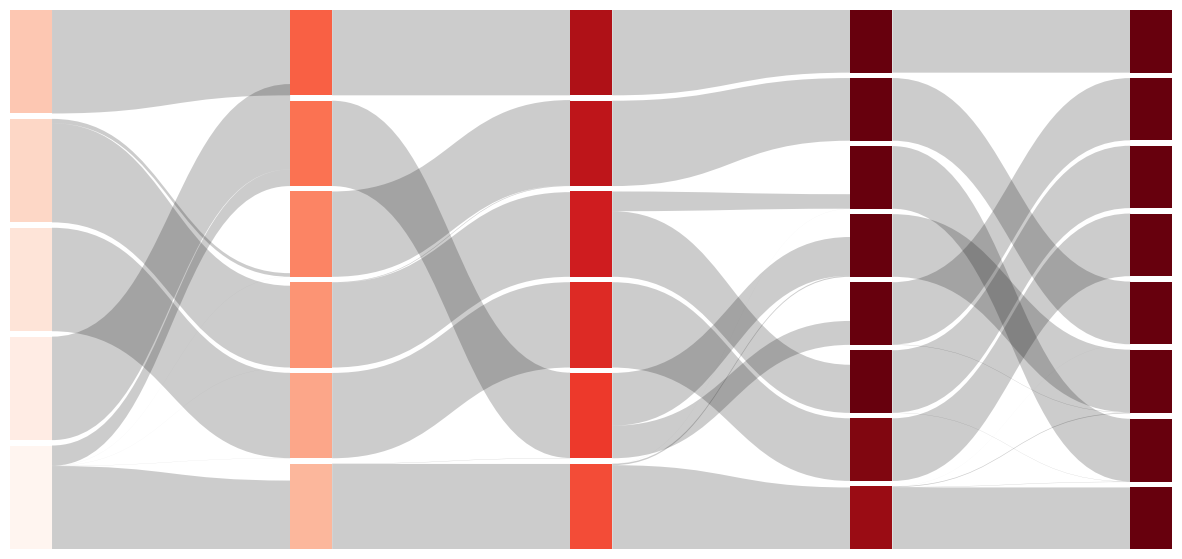

In [7]:
import matplotlib.pyplot as plt
from matplotlib_sankey import sankey

fig, ax = plt.subplots(figsize=(15, 7))
sankey(
    all_matrices,
    cmap="Reds",
    ax=ax,
    spacing=0.01,
)